# <font color = 'purple'>  TITANIC: AN EXPLORATORY DATA ANALYSIS AND PREDICTING IF JACK WOULD HAVE SURVIVED </font>
  
The goal of this Jupyter Notebook is to do some exploratorty data analysis on the people who were on board the RMS Titanic which met a very guesome end. I intend to use this Notebook to work on Feature Engineering and slicing data in DataFrame to prepare it for Machine Learning libraries. 

The second goal of this Jupyter Notebook is to see if we can predict with reasonable accuracy whether the character of Jack Dawson(portrayed by Leonardo DiCaprio) from James Cameron's Titanic would have survived. I have scoured the Internet chatrooms to find trivia information about the character and seen the movie again just to see if I can get information which related to the variables looked at in this dataset. 
 
I was able to find only segmented information regarding the character mostly because he isn't supposed to be on Titanic. He wins tickets from unnamed Swedes in gambling. The tickets however are for 3rd class and is a man of age 20 years and has no faily on board. 

So, to recap, this Notebook is split into two parts:
* Exploratory Data Analysis of the Titanic Dataset 
* Setting up Machine Learning Classifers for four major algorithms used for classification problems and use each of them to see whether Jack would have survived or not.

# <font color='Purple'>IMPORT LIBRARIES FOR DATA ANALYSIS</font>

In [2]:
# Libraries for data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
# print(os.listdir("../input"))


# <font color = 'purple'> Import data </font>


In [3]:
train_data = pd.read_csv('../Titanic/train.csv')
test_data = pd.read_csv('../Titanic/test.csv')


## <font color = 'purple'> There are different number of columns in train and test data. I want to see which ones are the different columns </font>


In [4]:
test_columns = test_data.columns.tolist()
train_columns = train_data.columns.tolist()
print('There are ',len(test_columns),' test columns ')
print('There are ',len(train_columns),' train columns \n')
print('***********columns in test data***********')
print(test_data.columns.values,'\n')
print('***********columns in train data***********')
print(train_data.columns.values,'\n')
diff= list(set(train_columns)-set(test_columns))
print('*************************************************')
print('The extra column in train data DataFrame is',diff)


There are  11  test columns 
There are  12  train columns 

***********columns in test data***********
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked'] 

***********columns in train data***********
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'] 

*************************************************
The extra column in train data DataFrame is ['Survived']


In [8]:
for x in test_columns:
    print(x)


PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


## <font color='purple'>Check null or NaN values in training data </font>

In [9]:
# There are 891 values in every column in training data except for age which has 714 values 
print('*******The NaN values in each column******* \n')
print(train_data.isnull().sum(),'\n')


*******The NaN values in each column******* 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



In [15]:
print('*******NaN values as % of 891 ******* \n')
print((train_data.isnull().sum()/891)*100)




*******NaN values as % of 891 ******* 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


## <font color= 'purple'>I am going to drop any column where more than 60% of the values are NaN </font>

## <font color='red'> Observations </font >
* So there was a column called Cabin which had 77.1% values that were NaN .  Since I chose 60 % of the values as acceptable NaN to keep the columns. Since Cabin had 77.1% values which were NaNs, so i dropped it. 

* There are other columns where some rows have NaN. Age has 19.86% values  and Embarrked has 0.225% values which are NaN  so I am dropping only the missing ROWS, NOT the columns.

In [46]:
train_data = pd.read_csv('../Titanic/train.csv')
train_clean = train_data 
for col in train_clean.columns:
    if train_clean[col].isnull().sum()/891 >= 0.6:
        train_clean =train_clean.drop(col,axis =1)
        
# train_clean=train_clean.dropna(axis=0)        
#Need to check if there are any more NaNs in the new dataframe 
train_clean.isnull().sum()/891
train_clean.head()
train_clean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64



## <font color ='purple'>LET'S LOOK AT THE CLEANED DATA FRAME FOR TRAINING DATA</font>

In [48]:
train_clean.describe()
# train_clean.isnull().values.any()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train_clean.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,S
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,S


## <font color ='purple'>Let's take care of the missing values in Age column </font>

I am filling the missing values in the Age column by taking the mean of the column and plugging that value back into the the missing rows in the Age column. Pandas provides you the option to choose the values that you want to replace the missing values with.


In [50]:
'''
There are 177 NaN values in Age. This is because there are empty Age values for whatever reason. I am going to fill these
empty values with the mean age
'''
train_clean['Age'] =  train_clean['Age'].fillna(train_clean['Age'].mean())
train_clean.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<font color ='purple'>**There are still some NaN values in Embarked column. I am going to repeat the proceedure that I used with Age and fill the missing rows in Embarked.**</font>


In [51]:
train_clean= train_clean.fillna(train_clean.mean())

train_clean.isnull().sum()
train_clean=train_clean.dropna(axis=0)
train_clean['Embarked'].isnull().sum()

0

# <font color ='purple'> TIME TO CLEAN THE TEST DATA. </font>

**Observations**
* 25.9% of all the Age values in the TEST dataset are all NaNs. **I am going to fill them with the mean value of the Age column in the testing dataset.**
* 0.239% of all values in Fare are NaN. **I will fill these as well with the mean of the column in the test set.**
* The rest of the columns don't have any empty values.
* I got rid of the Cabin column since I took it out in the train dataset as well.

In [52]:
test_data = pd.read_csv('../Titanic/test.csv')
test_data.sample(5)
# test_data.isnull().sum()
test_data = test_data.drop('Cabin', axis=1)
test_data.describe()
# test_data['Age'].count()
# test_data.columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
print('*******NaN values as % of the count of the values in each column ******* \n')
# test_data.isnull().sum()/test_data[]
for col in test_data.columns:
    print(col,':',(test_data[col].isnull().sum()/test_data[col].count())*100,'% values are NaNs')

*******NaN values as % of the count of the values in each column ******* 

PassengerId : 0.0 % values are NaNs
Pclass : 0.0 % values are NaNs
Name : 0.0 % values are NaNs
Sex : 0.0 % values are NaNs
Age : 25.9036144578 % values are NaNs
SibSp : 0.0 % values are NaNs
Parch : 0.0 % values are NaNs
Ticket : 0.0 % values are NaNs
Fare : 0.239808153477 % values are NaNs
Embarked : 0.0 % values are NaNs


In [54]:
# FIX AGE AND FARE COLUMN IN THE TEST SET.

## AGE 
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data.isnull().sum() # no NaNs in the Age column
# test_data.sample(5)

## FARE
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
# test_data.isnull().sum()  # no NaNs in the Fare column

test_clean = test_data
test_clean.sample(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
205,1097,1,"Omont, Mr. Alfred Fernand",male,30.27259,0,0,F.C. 12998,25.7417,C
315,1207,3,"Hagardon, Miss. Kate",female,17.00000,0,0,AQ/3. 30631,7.7333,Q
235,1127,3,"Vendel, Mr. Olof Edvin",male,20.00000,0,0,350416,7.8542,S
270,1162,1,"McCaffry, Mr. Thomas Francis",male,46.00000,0,0,13050,75.2417,C
57,949,3,"Abelseth, Mr. Olaus Jorgensen",male,25.00000,0,0,348122,7.6500,S
228,1120,3,"Everett, Mr. Thomas James",male,40.50000,0,0,C.A. 6212,15.1000,S
277,1169,2,"Faunthorpe, Mr. Harry",male,40.00000,1,0,2926,26.0000,S
100,992,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.00000,1,0,11778,55.4417,C
236,1128,1,"Warren, Mr. Frank Manley",male,64.00000,1,0,110813,75.2500,C
293,1185,1,"Dodge, Dr. Washington",male,53.00000,1,1,33638,81.8583,S


In [55]:
test_clean.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## <font color ='red'>So, we just cleaned the TEST dataset. It doesn't have any more NaNs and has the same columns as the TRAIN set, so we should be set to move on.
</font>

## <font color ='Mauve'>Below, I am creating temporary variables to store training and test set. This is because down the line while creating Fare segmentation has the tendency to mess up my saved and cleaned trained/test set. By creating temporary variables, I get around this.</font>

In [56]:
# temp variables just so I don't have to reload training, testing data and then cleaning it
train_try = train_clean
test_try = test_clean
data_all = [train_try,test_try]

In [57]:
train_try['Fare'].sample(10)

358      7.8792
144     11.5000
174     30.6958
393    113.2750
308     24.0000
68       7.9250
34      82.1708
32       7.7500
169     56.4958
313      7.8958
Name: Fare, dtype: float64

# <font color= 'purple'>I was reading through other kernels and read the approach taken in this kernel towards Fare and using it: </font>
    https://www.kaggle.com/startupsci/titanic-data-science-solutions
    
**The author here us creating a new Feature called FareBand by changing the Fare values to ordinal values. I find this approach interesting and hence am incorporating this in.**

* The author sets off by using the *pd.qcut* function to built quantiles and then group the survived based on the quantiles of the fare prices instead of  looking at the 'Fare' values as a continuous range of values.

In [58]:
train_try['FareBand'] = pd.qcut(train_try['Fare'], 4)
test_try['FareBand'] = pd.qcut(test_try['Fare'],4)
train_try[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
# test_clean[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [59]:
# train_clean.sample(5)
# train_try  = train_clean
# test_try = test_clean
type(train_try)
test_try.sample(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FareBand
157,1049,3,"Lundin, Miss. Olga Elida",female,23.00000,0,0,347469,7.8542,S,"(-0.001, 7.896]"
231,1123,1,"Willard, Miss. Constance",female,21.00000,0,0,113795,26.5500,S,"(14.454, 31.5]"
259,1151,3,"Midtsjo, Mr. Karl Albert",male,21.00000,0,0,345501,7.7750,S,"(-0.001, 7.896]"
13,905,2,"Howard, Mr. Benjamin",male,63.00000,1,0,24065,26.0000,S,"(14.454, 31.5]"
99,991,3,"Nancarrow, Mr. William Henry",male,33.00000,0,0,A./5. 3338,8.0500,S,"(7.896, 14.454]"
11,903,1,"Jones, Mr. Charles Cresson",male,46.00000,0,0,694,26.0000,S,"(14.454, 31.5]"
322,1214,2,"Nesson, Mr. Israel",male,26.00000,0,0,244368,13.0000,S,"(7.896, 14.454]"
101,993,2,"Weisz, Mr. Leopold",male,27.00000,1,0,228414,26.0000,S,"(14.454, 31.5]"
62,954,3,"Bjorklund, Mr. Ernst Herbert",male,18.00000,0,0,347090,7.7500,S,"(-0.001, 7.896]"
380,1272,3,"O'Connor, Mr. Patrick",male,30.27259,0,0,366713,7.7500,Q,"(-0.001, 7.896]"


In [60]:
for dataset in data_all:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)



In [61]:
train_try = train_try.drop(['FareBand'], axis=1)
test_try = test_try.drop(['FareBand'], axis =1)

In [62]:
train_clean = train_try 
train_clean.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,0,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,1,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,3,C
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,0,Q
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,3,C
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,1,S
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,0,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,3,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,3,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,3,S


## <font color='purple'>Great! So now we have changed the Fare variable into  a categorical variable. Below are the category delineations </text>

* For fare value greater than 7.91, the class is 0.
* For fare values between 7.91 and 14.454, the class is 1.
* For fare values between 14.454 and 31, the class is 2.
* For fare values greater than 31, the class is 3.


In [65]:
train_clean.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
189,190,0,3,"Turcin, Mr. Stjepan",male,36.000000,0,0,349247,0,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,3,S
527,528,0,1,"Farthing, Mr. John",male,29.699118,0,0,PC 17483,3,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.000000,1,2,113760,3,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.000000,0,0,350060,0,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.000000,0,2,11752,2,S
573,574,1,3,"Kelly, Miss. Mary",female,29.699118,0,0,14312,0,Q
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,0,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,29.699118,0,0,334912,0,Q
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.000000,0,0,110152,3,S


## <font color = 'purple'>The test data has also had its Fare values converted into categories instead of a range of numbers.</font>

In [66]:
test_clean = test_try 


In [67]:
test_clean.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
210,1102,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,2,S
78,970,2,"Aldworth, Mr. Charles Augustus",male,30.0,0,0,248744,1,S
310,1202,3,"Cacic, Mr. Jego Grga",male,18.0,0,0,315091,1,S
302,1194,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,2,S
328,1220,2,"Clarke, Mr. Charles Valentine",male,29.0,1,0,2003,2,S
319,1211,2,"Jefferys, Mr. Ernest Wilfred",male,22.0,2,0,C.A. 31029,3,S
353,1245,2,"Herman, Mr. Samuel",male,49.0,1,2,220845,3,S
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,0,C
162,1054,2,"Wright, Miss. Marion",female,26.0,0,0,220844,1,S
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,3,C


# <font color ='purple'> LET'S DO SOME CORRELATION TESTING </font>

## <font color ='green'>Since our main question revolves around whether people survived or not, the correlations will be considered with regards to their relation to the Survived column.
    
  <font color='red'>**OBSERVATIONS**  </font>
  


* Obviously Survived has the strongest correlation with itself.
* The correlation values can be anywhere from -1 to 1. 
* The magnitude of the correlation tells us of how strongly the variables are related.
* A negative sign implies inverse relationship.
* **Based on the following results, the strongest relationship that 'Survived' has is with Pclass**

**These variables share the strongest correlation with Survived.**

*  PClass = -0.335549
*  Fare     =   0.295875
* Parch    =   0.083151

Since Survived is so strongly defined by Pclass, let's explore that. .



  
  **Correction: I saw that Sex wasn't included in the correlation, so I looked and had to encode into numerical data from its categorical origins**
 * Sex = 0.541585
## <font color='Red'>I will be using the above mentioned Four variables to construct a machine learning model</font>


In [69]:
pd.DataFrame(train_clean.corr()['Survived']).reset_index()
train_clean.corr()['Survived']

PassengerId   -0.005028
Survived       1.000000
Pclass        -0.335549
Age           -0.074673
SibSp         -0.034040
Parch          0.083151
Fare           0.293182
Name: Survived, dtype: float64

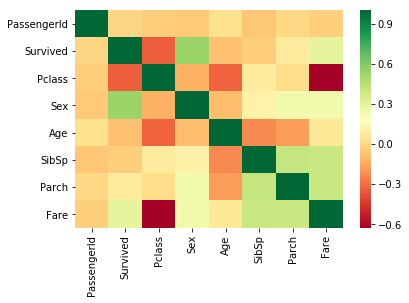

In [73]:
sns.heatmap(train_clean.corr(),cmap='RdYlGn')
fig = plt.gcf()
plt.show()

## <font color ='Mauve'>Now you might notice that Sex, Ticket and Embarked are missing from the correlation table printed above. That is because they are all categorical values. Correlation is based on the idea of how one variable changes in regards to change in another variables. What happens to variables *a* when variable *b* increases or decreases. Since Sex, Ticket and Embarked not numerical values, we can't generate this correlation.</font>

# So we will have to convert them into categorical values.
**In this case, the categories wouuld be as follows:**
* 1= Female
* 0= Male

In [70]:
train_clean['Sex'] =  train_clean['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_clean['Sex'] = test_clean['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [71]:
test_clean.sample(5)
# train_clean.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
238,1130,2,"Hiltunen, Miss. Marta",1,18.0,1,1,250650,1,S
78,970,2,"Aldworth, Mr. Charles Augustus",0,30.0,0,0,248744,1,S
340,1232,2,"Fillbrook, Mr. Joseph Charles",0,18.0,0,0,C.A. 15185,1,S
381,1273,3,"Foley, Mr. Joseph",0,26.0,0,0,330910,0,Q
92,984,1,"Davidson, Mrs. Thornton (Orian Hays)",1,27.0,1,2,F.C. 12750,3,S


In [74]:
train_clean.sample(7)
# train_clean.corr()['Survived']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
550,551,1,1,"Thayer, Mr. John Borland Jr",0,17.000000,0,2,17421,3,C
826,827,0,3,"Lam, Mr. Len",0,29.699118,0,0,1601,3,S
122,123,0,2,"Nasser, Mr. Nicholas",0,32.500000,1,0,237736,2,C
467,468,0,1,"Smart, Mr. John Montgomery",0,56.000000,0,0,113792,2,S
770,771,0,3,"Lievens, Mr. Rene Aime",0,24.000000,0,0,345781,1,S
400,401,1,3,"Niskanen, Mr. Juha",0,39.000000,0,0,STON/O 2. 3101289,1,S
788,789,1,3,"Dean, Master. Bertram Vere",0,1.000000,1,2,C.A. 2315,2,S


# <font color='Purple'> Let's make the heat map of these correlations </font>

# <font color = 'green'> LET'S DO SOME VISUALIZATION FOR THE TRAINING DATA </font>

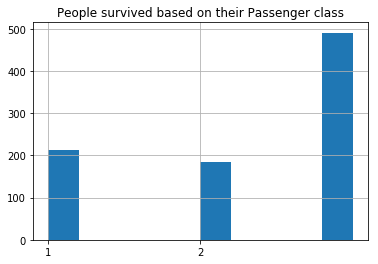

In [30]:
# Passenger class with survived. 
class_surv = pd.DataFrame(train_clean[['Pclass','Survived']]).groupby('Pclass', as_index=False).count()
plt.hist(class_surv['Pclass'], weights=class_surv['Survived'])
plt.xticks(np.arange(1,3))
plt.grid()
plt.title('People survived based on their Passenger class')
plt.show()

## <font color='green'> Let's take a look at the test data set and see how men fared against women </font>
**Taking a look at the data below, we can see that  **

* Women had a mean age of 28.077 years 
* Men had mean age of 30.506 years

In [31]:
train_clean.sample(5)
train_clean[["Survived", "Sex"]].groupby(['Sex'], as_index=False).count()#.mean().sort_values(by='Survived',ascending=False)
train_clean[["Survived", "Sex"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)


,Sex,Survived
1,1,0.740385
0,0,0.188908


# <font color ='purple'> LET'S GET READY TO PREPARE THIS DATA FOR JACK </font>


## <font color ='purple'> Since we saw that the 4 variables which are most strongly correlated with Survival are <font color='red'>Pclass, Fare and Parch, Sex</font> so let's construct a dataFrame to deal with that. Oh and I  am adding in age as well just because why not</font>

## <font color ='red'>Below, I construct a data Frame with only the variables which I am interested in exploring further. </font>


In [76]:
jack_df = train_clean[["Pclass","Sex","Age", "Parch","Fare", "Survived"]]


In [77]:
jack_df.sample(10)

,Pclass,Sex,Age,Parch,Fare,Survived
484,1,0,25.000000,0,3,1
83,1,0,28.000000,0,3,0
871,1,1,47.000000,1,3,1
273,1,0,37.000000,1,2,0
237,2,1,8.000000,2,2,1
216,3,1,27.000000,0,1,1
538,3,0,29.699118,0,2,0
336,1,0,29.000000,0,3,0
156,3,1,16.000000,0,0,1
442,3,0,25.000000,0,0,0


In [78]:
test_clean = test_clean[["Pclass","Sex","Age", "Parch","Fare"]]


In [79]:
test_clean.sample(5)

,Pclass,Sex,Age,Parch,Fare
251,3,0,20.00000,0,1
320,3,0,26.00000,0,0
3,3,0,27.00000,0,1
249,3,1,30.27259,0,2
237,3,0,20.00000,0,0


# <font color ='Purple'>I am going to build some test data for Jack that I have been able to find over the Internet related to these variables</font>

**How did I collect this data??**

This thing called the Internet!!! LOL

No, really this is how!

**Pclass:** At 0:47 mark of this video, you can see that the tickets which Jack won were 3rd class tickets. 

                    https://www.youtube.com/watch?v=k2p_5FHMONU

**Sex:** Obviously!!!

**Age:** Per Wiki and James Cameron himself, Jack was 20 years old at the time of events of Titanic. 
                http://jamescameronstitanic.wikia.com/wiki/Jack_Dawson
                
**Parch:** He had no children or parents with him.

**Fare**: The way we engineered our Fares into quartiles, his **Pclass** would make his **Fare** the categorical value of **0**

<font color ='red'>**Observation**</font>

*  I am trying to build a datFrame from a dictionary. This is an interesting way of data entry and something I will use in my future kernels



In [80]:
# jack_ = {'Pclass':3, 'Sex':0, 'Age': 20, 'Parch':0, 'Fare':0}
jack_ = {'Pclass':[3], 'Sex':[0], 'Age': [20], 'Parch':[0], 'Fare':[0]}
jack_test= pd.DataFrame(jack_, columns=['Pclass','Sex','Age','Parch','Fare'])
jack_test

,Pclass,Sex,Age,Parch,Fare
0,3,0,20,0,0


#  <font color = 'purple'>We are going to use different machine learning models that deal with classification, and see how they compare on this problem.</font>
**The algorithms and their scores are listed below**

* Logistic Regressions**(78.74)** 
* KNN**(85.04)**
* Support Vector Classifiers**(86.61)**
* Decision Tree Classifiers**(93.81)**

## <font color = 'green'>All of these algorithms predict that based on the data I provided for Jack, he would have died</font>


# <font color ='purple'> Let's set up test/train for the dataset and import the machine learning libraries</font>

In [1]:
## MACHINE LEARNING LIBRARIES 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Let's set up data
# all_features.head(5)
x_train = jack_df.drop('Survived', axis=1)
y_train = jack_df[["Survived"]]
# x_test  = test_clean.drop("PassengerId", axis=1).copy()
x_test = test_clean.copy()
x_train.shape,y_train.shape, x_test.shape#,  y_test.shape

NameError: name 'jack_df' is not defined

In [39]:
x_train.head(5)


,Pclass,Sex,Age,Parch,Fare
0,3,0,22.0,0,0
1,1,1,38.0,0,3
2,3,1,26.0,0,1
3,1,1,35.0,0,3
4,3,0,35.0,0,1


In [40]:
x_test.head(5)

,Pclass,Sex,Age,Parch,Fare
0,3,0,34.5,0,0
1,3,1,47.0,0,0
2,2,0,62.0,0,1
3,3,0,27.0,0,1
4,3,1,22.0,1,1


In [41]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [42]:
def jack_output(jack_p):
    for i in jack_p:
        print(jack_p[i])
        if jack_p == 0:
            result = "JACK DIDN'T SURVIVE :'(" 
        else:
            result = 'JACK SURVIVED!!!!'
    return result 


## LOGISTIC REGRESSION

**Basic intro for Logistic Regression**
* Logistic Regression is used binary classification problems.
* Based on Sigmoid function which classifies a new point as class A or B depending on whether it is above or below a certain threshold value X.
* This serves as a powerful way of classifying binary problems becuase it only cares about whether a new value is above or below a certain threshold. 
* Hence, I used this algorithm for this problem
![](http://cdn-images-1.medium.com/max/800/1*RqXFpiNGwdiKBWyLJc_E7g.png)



#### 

In [43]:
# Logistic Regression 
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
jack_log = clf.predict(jack_test)
jack_logVal = jack_output(jack_log)
log_score = round(clf.score(x_train,y_train)*100,2)
print('\n Per Logistic Regression ', jack_logVal,'\n')
print('Logistic Regression score: ',log_score)


0

 Per Logistic Regression  JACK DIDN'T SURVIVE :'( 

Logistic Regression score:  78.74


/home/sanwal092/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN 
**Basic Intro for KNN**
 * KNN is another classification algorithm.
 * It works by using clusters as the delineation for the known and unknown datasets. 
 * It, first of all, starts by creating random clusters(you can choose clusters based on meta knowledge of the dataset).
 * Now, when a new datapoint comes in, it sees what is the closest cluster to the data point. 
 * Once that is done, it recalculates the clusters centers adn recalculates the repeats the process until the best possible classification has been found.

In [44]:
# K Nearest Neighbors 
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
jack_nn = knn.predict(jack_test)
jack_knn_out = jack_output(jack_nn)
k_score = round(knn.score(x_train, y_train) * 100, 2)
print('\nPer KNN ',jack_knn_out,'\n')
print('The score for KNN is: ',k_score)
# print(y_pred)

0

Per KNN  JACK DIDN'T SURVIVE :'( 

The score for KNN is:  85.04


/home/sanwal092/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# Support Vector Classifiers

**Basic Intro to SVC**

* Once considered the ultimate machine learning algorithm.
* It creates classification by seperating the classes best  by using a hyperplane to seperate them.

In [45]:
# Support Vector Classifiers
svc = SVC(gamma='auto')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
jack_svc = svc.predict(jack_test)
jack_svc_out = jack_output(jack_svc)
svc_score = round(svc.score(x_train,y_train)*100,2)
print('Per SVC ', jack_svc_out)
print('The score for SVC is: ', svc_score)


0
Per SVC  JACK DIDN'T SURVIVE :'(
The score for SVC is:  86.61


/home/sanwal092/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree

**Basic Intro to  Decision Tree**

* Classifies an unknown data point by slicing data across the dimensions. 
* it continues this until there is an optimal level of classification achieved or the some preset conditionn is met. 

![](http://cdn-images-1.medium.com/max/800/1*1CchuZc1nLM3B60zS7A1yw.png)

In [46]:
# Decision Tree Classifiers

tree= DecisionTreeClassifier(max_depth = 100, random_state = 42)
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)
jack_tree = tree.predict(jack_test)
jack_tree_out = jack_output(jack_tree)
tree_score = round(tree.score(x_train, y_train)*100,2)
print('\nPer Decision Tree ', jack_tree_out,'\n')
print('The score for Decision Tree classifer is: ',tree_score)


0

Per Decision Tree  JACK DIDN'T SURVIVE :'( 

The score for Decision Tree classifer is:  93.81


## Let's keep track of the progress we are making with the Algorithms 


In [81]:
algo_scores = {'Logistic Regression': [log_score], 'KNN':[k_score], 'SVC': [svc_score], 'Decision Tree':[tree_score]}
algo_df = (pd.DataFrame(algo_scores, columns = list(algo_scores.keys())).T)
algo_perform = algo_df.reset_index()
algo_perform.columns = ['Algorithm', 'Score']
algo_perform

NameError: name 'log_score' is not defined

In [48]:
plt.plot(algo_perform['Algorithm'],algo_perform['Score'])
plt.title('The performance of the algorithms')
plt.grid()



# <font color='red'> Conclusion</font>
* If Jack existed in real life, these models predict that he would have died more likely than not and not from hypothermia because he Rose wasn't willing to take turns on that make shift raft.
* Based on the fact that, Jack had 
    * Third class tickets.
    * 20 years old male.
    * Didn't have any parents or children with him.
    * Had no siblings with him. 
    
    ## HE WOULD HAVE MORE LIKELY THAN NOT  DIED. 
    

# General purpose machine learning predictions


In [63]:
from sklearn.tree import DecisionTreeClassifier
clf =  DecisionTreeClassifier(max_depth = 100, random_state = 42)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
pred.shape

(418,)

In [66]:
 from sklearn.ensemble import RandomForestClassifier
for_clf = RandomForestClassifier(n_estimators = 100)
for_clf.fit(x_train,y_train)
pred_for = for_clf.predict(x_test)
pred_for.shape

/home/sanwal092/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


(418,)

In [68]:
# Submission 
submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':pred_for})
submission.head()



,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [69]:
filename = 'Titanic Predictions forrest.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions forrest.csv
